In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 23.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 28.6MB/s]


In [3]:
data = pd.read_csv('./train.csv')

In [4]:

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ClientPeriod,5282.0,32.397009,24.550326,0.00,9.0000,29.0,55.00,72.00
MonthlySpending,5282.0,64.924754,30.176464,18.25,35.4625,70.4,90.05,118.75
IsSeniorCitizen,5282.0,0.159409,0.366092,0.00,0.0000,0.0,0.00,1.00
Churn,5282.0,0.262022,0.439776,0.00,0.0000,0.0,1.00,1.00


In [6]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [7]:
nan_counts = data.isna().sum()

nan_counts

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [ ]:
empty_string_counts = data.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()

print("Количество пустых строк:")
print(empty_string_counts)

/tmp/ipython-input-1183817311.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_string_counts = data.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()


Количество пустых строк:
ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [ ]:
mask = data['TotalSpent'].apply(lambda x: isinstance(x, str) and x.strip() == '')
data.loc[mask, 'TotalSpent'] = 0

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

In [ ]:
q_string_counts = data.applymap(lambda x: isinstance(x, str) and x.strip() == '?').sum()

print("Количество пустых строк:")
print(q_string_counts)

/tmp/ipython-input-1522525018.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  q_string_counts = data.applymap(lambda x: isinstance(x, str) and x.strip() == '?').sum()


Количество пустых строк:
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [ ]:
data_origin = data.copy()

Начнём с категориальных признаков.
Пойдём по порядку расположения в таблице.

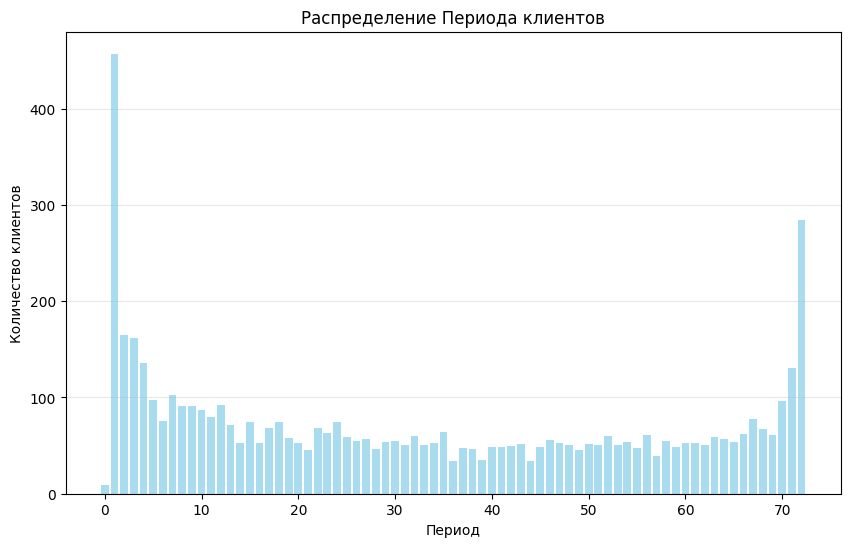

In [ ]:
value_counts = data['ClientPeriod'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue', alpha=0.7)
plt.title('Распределение Периода клиентов')
plt.xlabel('Период')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', alpha=0.3)

plt.show()

У ClientPeriod сильный перекос влево, то есть нормализовать логарифмом или корнем или возведением в квадрат бессмысленно (возможно станет хуже). Оставлю как есть

In [ ]:
data['Sex'] = data['Sex'].replace({'Male':1, 'Female':0})

/tmp/ipython-input-4038858295.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'Male':1, 'Female':0})


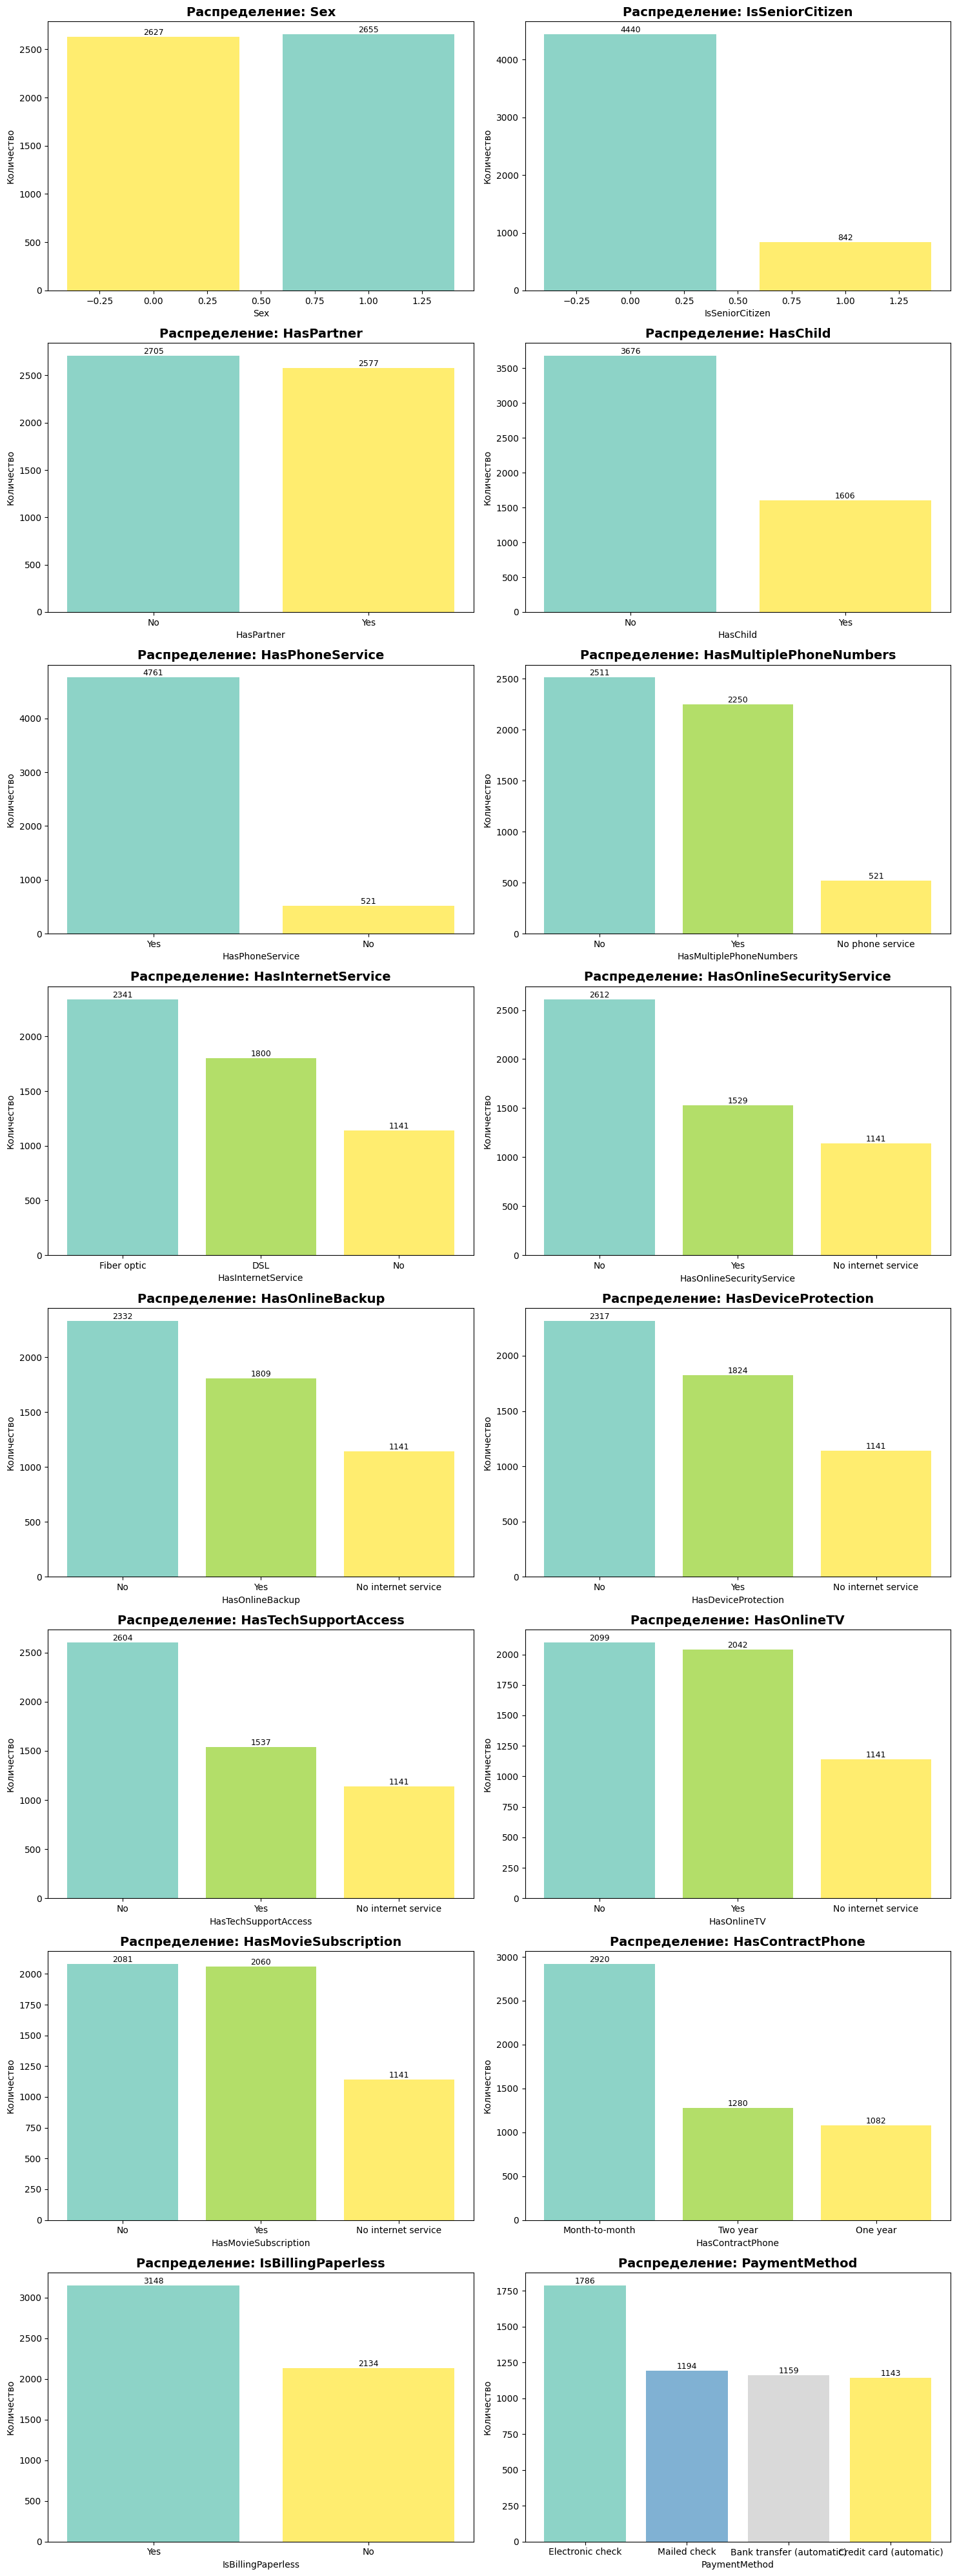

In [ ]:
n_cols = 2
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(cat_cols):
    if i < len(axes):
        value_counts = data[col].value_counts()

        bars = axes[i].bar(value_counts.index, value_counts.values,
                          color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))

        axes[i].set_title(f'Распределение: {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Количество')

        if len(value_counts) > 5:
            axes[i].tick_params(axis='x', rotation=45)

        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

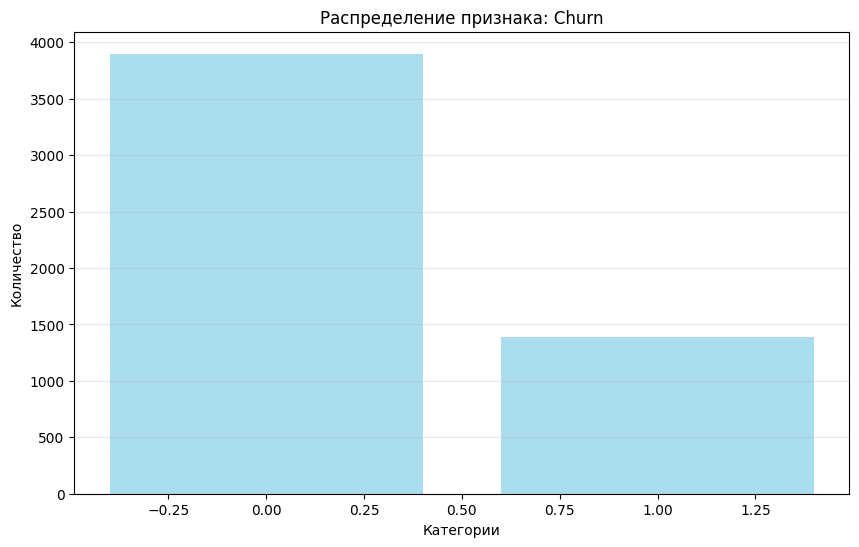

In [ ]:
value_counts = data[target_col].value_counts()

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue', alpha=0.7)
plt.title('Распределение признака: Churn')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.3)
plt.show()

Классы Таргета несбаланисированны. В категориальных признаках с >2 классами по большому счёту везде сбалансированное распределение - нет каких то сильных выбросов, поэтому можно просто воспользоваться Ohe.
А вот в двух бинарных признаках есть несбалансированное распределение. Поэтому на обучении воспользуюсь class_weight='balanced'.

In [ ]:
to_num_columns = ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']

for col in to_num_columns:
    if col in data.columns:
        data[col] = data[col].replace({'Yes': 1, 'No': 0})

data.head()

/tmp/ipython-input-710815743.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'Yes': 1, 'No': 0})


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,0
1,72,25.85,1872.20,1,0,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),0
2,1,75.90,75.90,1,0,0,0,1,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,1,Electronic check,1
3,32,79.30,2570.00,0,1,1,0,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,0,Mailed check,0
4,60,115.25,6758.45,0,0,1,1,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   int64  
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   int64  
 6   HasChild                  5282 non-null   int64  
 7   HasPhoneService           5282 non-null   int64  
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
new_categ_cols = ["HasMultiplePhoneNumbers", "HasInternetService", "HasOnlineSecurityService", "HasOnlineBackup", "HasDeviceProtection", "HasTechSupportAccess", "HasOnlineTV", "HasMovieSubscription", "HasContractPhone", "PaymentMethod"]

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

encoded_array = ohe.fit_transform(data[new_categ_cols])
encoded_columns = ohe.get_feature_names_out(new_categ_cols)
data_encoded = pd.DataFrame(encoded_array, columns=encoded_columns, index=data.index)

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns[:-1].tolist()
data_final = pd.concat([data[numerical_columns], data_encoded], axis=1)

In [ ]:
data_final = pd.concat([data_final, data[target_col]], axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   float64
 3   Sex                                           5282 non-null   int64  
 4   IsSeniorCitizen                               5282 non-null   int64  
 5   HasPartner                                    5282 non-null   int64  
 6   HasChild                                      5282 non-null   int64  
 7   HasPhoneService                               5282 non-null   int64  
 8   IsBillingPaperless                            5282 non-null   int64  
 9   HasMultiplePhoneNumbers_No phone service      5282 non-null   f

Корреляции с таргетной переменной:
                                                 Churn
Churn                                         1.000000
HasInternetService_Fiber optic                0.300399
PaymentMethod_Electronic check                0.296715
IsBillingPaperless                            0.194040
MonthlySpending                               0.184769
IsSeniorCitizen                               0.156872
HasOnlineTV_Yes                               0.059193
HasMovieSubscription_Yes                      0.050521
HasMultiplePhoneNumbers_Yes                   0.039572
HasPhoneService                               0.010849
Sex                                          -0.008325
HasMultiplePhoneNumbers_No phone service     -0.010849
HasDeviceProtection_Yes                      -0.068752
PaymentMethod_Mailed check                   -0.085284
HasOnlineBackup_Yes                          -0.088003
PaymentMethod_Credit card (automatic)        -0.140615
HasPartner                    

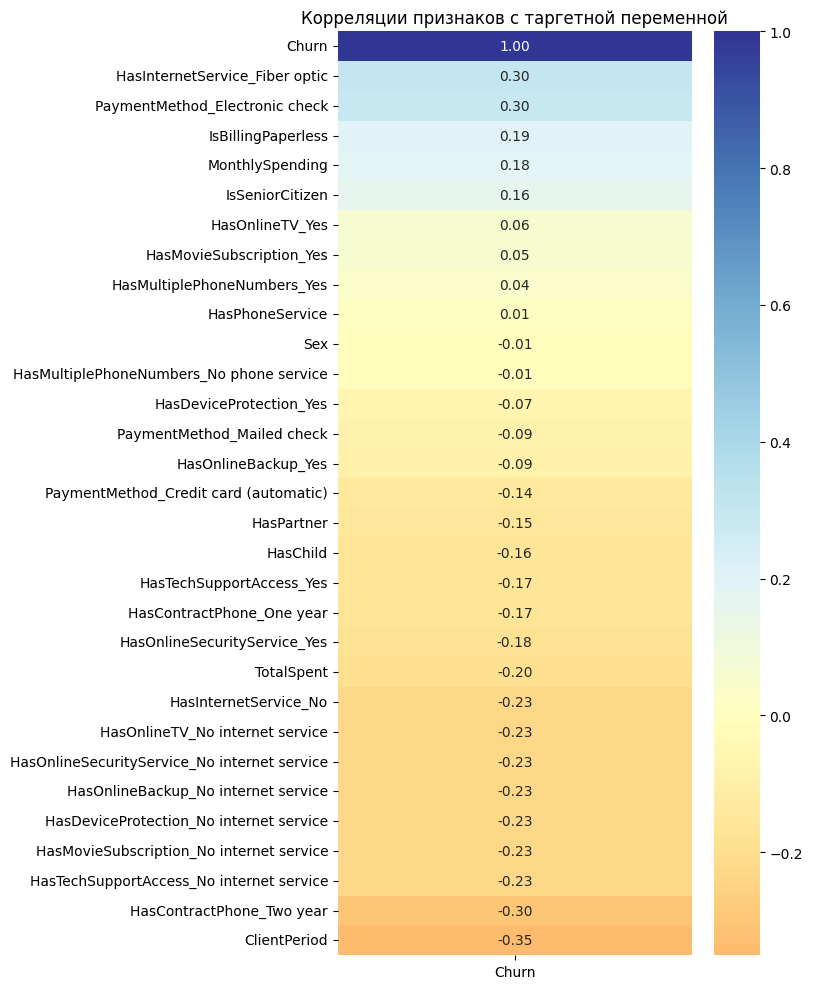

In [ ]:
import seaborn as sns
target_correlations = data_final.corr()[['Churn']].sort_values('Churn', ascending=False)

print("Корреляции с таргетной переменной:")
print(target_correlations)

plt.figure(figsize=(8, 10))
sns.heatmap(target_correlations, annot=True, cmap='RdYlBu', center=0, fmt='.2f')
plt.title('Корреляции признаков с таргетной переменной')
plt.tight_layout()
plt.show()

## Применение линейных моделей


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
ClientPeriod,5282.0,32.397009,24.550326,0.00,9.0000,29.00,55.0000,72.00
MonthlySpending,5282.0,64.924754,30.176464,18.25,35.4625,70.40,90.0500,118.75
TotalSpent,5282.0,2287.486161,2269.049195,0.00,395.7250,1405.65,3795.2125,8684.80
Sex,5282.0,0.502651,0.500040,0.00,0.0000,1.00,1.0000,1.00
IsSeniorCitizen,5282.0,0.159409,0.366092,0.00,0.0000,0.00,0.0000,1.00
HasPartner,5282.0,0.487883,0.499900,0.00,0.0000,0.00,1.0000,1.00
HasChild,5282.0,0.304051,0.460048,0.00,0.0000,0.00,1.0000,1.00
HasPhoneService,5282.0,0.901363,0.298202,0.00,1.0000,1.00,1.0000,1.00
IsBillingPaperless,5282.0,0.595986,0.490747,0.00,0.0000,1.00,1.0000,1.00
HasMultiplePhoneNumbers_No phone service,5282.0,0.098637,0.298202,0.00,0.0000,0.00,0.0000,1.00


In [ ]:
cols_to_scale = ["ClientPeriod", "MonthlySpending", "TotalSpent"]

scaler = StandardScaler()

data_scaled = data_final.copy()
data_scaled[cols_to_scale] = scaler.fit_transform(data_final[cols_to_scale])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data_scaled.drop('Churn',axis=1), data_scaled['Churn'], test_size=0.2, random_state=42)

In [ ]:
Cs = [100, 10, 1, 0.1, 0.01, 0.001]
model = LogisticRegressionCV(
    Cs=Cs,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    max_iter=1000,
    refit=True,
    class_weight='balanced',
    penalty='l2',
)

model.fit(X_train, y_train)

print(f"Лучший параметр C: {model.C_[0]}")
print(f"Все tested C: {model.Cs_}")
print(f"Средние ROC-AUC для каждого C: {model.scores_[1].mean(axis=0)}")

Лучший параметр C: 10.0
Все tested C: [1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03]
Средние ROC-AUC для каждого C: [0.84851283 0.84879276 0.84836086 0.84746824 0.84385827 0.83785156]


Лучший C = 10

In [ ]:
best_log_model = LogisticRegressionCV(
    Cs=[10],
    cv=5,
    scoring='roc_auc',
    random_state=42,
    max_iter=1000,
    refit=True,
    class_weight='balanced',
    penalty='l2',
)

best_log_model.fit(X_train, y_train)
print(f"Средние ROC-AUC: {best_log_model.scores_[1]}")

Средние ROC-AUC: [[0.82964961]
 [0.83634992]
 [0.85520362]
 [0.86195469]
 [0.86034228]]


In [ ]:
np.mean(best_log_model.scores_[1])

np.float64(0.8487000266875959)

0.8487000266875959

При C=10, class_weight='balanced'.

## Применение градиентного бустинга


In [ ]:
X_train_origin, X_val_origin, y_train_origin, y_val_origin = train_test_split(data_origin.drop("Churn", axis=1), data_origin[target_col],
                                                       train_size=0.8,
                                                       random_state=42)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
import catboost

boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')

boosting_model.fit(X_train_origin, y_train_origin)

y_val_predicted = boosting_model.predict_proba(X_val_origin)[:, 1]

Learning rate set to 0.083391
0:	total: 64.3ms	remaining: 12.8s
1:	total: 77.3ms	remaining: 7.65s
2:	total: 91.2ms	remaining: 5.99s
3:	total: 106ms	remaining: 5.19s
4:	total: 120ms	remaining: 4.66s
5:	total: 133ms	remaining: 4.3s
6:	total: 144ms	remaining: 3.96s
7:	total: 174ms	remaining: 4.18s
8:	total: 206ms	remaining: 4.38s
9:	total: 227ms	remaining: 4.32s
10:	total: 241ms	remaining: 4.13s
11:	total: 255ms	remaining: 3.99s
12:	total: 270ms	remaining: 3.89s
13:	total: 285ms	remaining: 3.79s
14:	total: 300ms	remaining: 3.69s
15:	total: 314ms	remaining: 3.62s
16:	total: 328ms	remaining: 3.53s
17:	total: 340ms	remaining: 3.44s
18:	total: 352ms	remaining: 3.35s
19:	total: 366ms	remaining: 3.29s
20:	total: 381ms	remaining: 3.25s
21:	total: 395ms	remaining: 3.19s
22:	total: 412ms	remaining: 3.17s
23:	total: 425ms	remaining: 3.12s
24:	total: 438ms	remaining: 3.06s
25:	total: 450ms	remaining: 3.01s
26:	total: 465ms	remaining: 2.98s
27:	total: 471ms	remaining: 2.89s
28:	total: 484ms	remaining

In [ ]:
val_auc = roc_auc_score(y_val_origin, y_val_predicted)
print(val_auc)

0.8228013224850159


Со стандартными параметрами roc_auc вышел 0.82 (что меньше, чем у логистической регрессии)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=300,
                                             depth=4,
                                             learning_rate = 0.03,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model.fit(X_train_origin, y_train_origin)

y_val_predicted = boosting_model.predict_proba(X_val_origin)[:, 1]
val_auc = roc_auc_score(y_val_origin, y_val_predicted)
print(val_auc)

0:	total: 48.1ms	remaining: 14.4s
1:	total: 88.3ms	remaining: 13.2s
2:	total: 111ms	remaining: 11s
3:	total: 130ms	remaining: 9.61s
4:	total: 153ms	remaining: 9.01s
5:	total: 178ms	remaining: 8.73s
6:	total: 211ms	remaining: 8.82s
7:	total: 219ms	remaining: 8s
8:	total: 246ms	remaining: 7.94s
9:	total: 270ms	remaining: 7.82s
10:	total: 285ms	remaining: 7.49s
11:	total: 300ms	remaining: 7.21s
12:	total: 326ms	remaining: 7.2s
13:	total: 345ms	remaining: 7.05s
14:	total: 358ms	remaining: 6.81s
15:	total: 402ms	remaining: 7.13s
16:	total: 435ms	remaining: 7.25s
17:	total: 466ms	remaining: 7.29s
18:	total: 504ms	remaining: 7.46s
19:	total: 542ms	remaining: 7.58s
20:	total: 550ms	remaining: 7.3s
21:	total: 564ms	remaining: 7.12s
22:	total: 576ms	remaining: 6.93s
23:	total: 636ms	remaining: 7.32s
24:	total: 675ms	remaining: 7.42s
25:	total: 705ms	remaining: 7.43s
26:	total: 746ms	remaining: 7.54s
27:	total: 760ms	remaining: 7.38s
28:	total: 772ms	remaining: 7.22s
29:	total: 818ms	remaining: 7

0.8327453569878372

Я немного времени подбирал вручную параметры n_estimators (100,200,300,400), learning_rate (0.01,0.03,0.05,0.1) и depth (3,4,5,7,8) и пришел к выводу, что лучше параметров, чем n_estimators=300,depth=4,learning_rate = 0.03 я не получил.

Обработаю тестовые данные

In [ ]:
X_test = pd.read_csv('./test.csv')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
empty_string_counts_test = X_test.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()

print("Количество пустых строк:")
print(empty_string_counts_test)

Количество пустых строк:
ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64


/tmp/ipython-input-279416647.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_string_counts_test = X_test.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()


In [ ]:
mask_test = X_test['TotalSpent'].apply(lambda x: isinstance(x, str) and x.strip() == '')
X_test.loc[mask_test, 'TotalSpent'] = 0
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'])

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
X_new_test = X_test.copy()

In [ ]:
X_new_test['Sex'] = X_new_test['Sex'].replace({'Male':1, 'Female':0})

for col in to_num_columns:
    if col in X_new_test.columns:
        X_new_test[col] = X_new_test[col].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-629479910.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_new_test['Sex'] = X_new_test['Sex'].replace({'Male':1, 'Female':0})
/tmp/ipython-input-629479910.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_new_test[col] = X_new_test[col].replace({'Yes': 1, 'No': 0})


In [ ]:
encoded_array_test = ohe.transform(X_new_test[new_categ_cols])
data_encoded_test = pd.DataFrame(encoded_array_test, columns=encoded_columns, index=X_new_test.index)

test_numerical_columns = X_new_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
data_final_test = pd.concat([X_new_test[test_numerical_columns], data_encoded_test], axis=1)

In [ ]:
data_test_scaled = data_final_test.copy()

In [ ]:
data_test_scaled[cols_to_scale] = scaler.transform(data_final_test[cols_to_scale])

# Предсказания

In [ ]:
best_catboost_model = boosting_model

In [ ]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_catboost_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
best_logistic_model = best_log_model

In [ ]:
submission['Churn'] = best_logistic_model.predict_proba(data_test_scaled)[:, 1]
submission.to_csv('./my_submission2.csv', index=False)

ИТОГО:

Лучшая модель на train - LogisticRegression (0.84606)

Лучшая модель на test - Catboost (0.85278)
